In [113]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import re
from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt


from clean_tweets_dataframe import Clean_Tweets


In [114]:
CSV_PATH = "../processed_tweet_data.csv"
CLEANED_SAVE_PATH = "../cleaned_tweet_data.csv"

In [115]:
# PreProcessing

In [116]:
# taking a csv file path and reading a dataframe

def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")
    
    

In [117]:
# replacing hash tags  starting by @ and links
def clean_text(text):
    hash_tag_removed = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
    hash_tag_removed = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)

    removed_links = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    cleaned = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', removed_links)
    return cleaned

In [118]:
def preprocess_and_clean(df: pd.DataFrame, save=False) -> pd.DataFrame:
    
    Tweet_cleaner = Clean_Tweets(df)
    
    df = Tweet_cleaner.drop_duplicate(df)
    
    df = Tweet_cleaner.drop_unwanted_column(df)
    
    df = Tweet_cleaner.drop_unwanted_column(df)
    
    df = Tweet_cleaner.convert_to_datetime(df)
    
    df = Tweet_cleaner.convert_to_numbers(df)
    
    df = Tweet_cleaner.remove_non_english_tweets(df)
    
    
    df['clean_text']= df['original_text'].astype(str)
    df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
    
    df['clean_text']  = df['clean_text'].apply(clean_text)

    
    
    print("data cleaned...")
    print(df)
    
    if save:
        try: 
            df.to_csv(CLEANED_SAVE_PATH, index=False)
            print('File Successfully Saved.!!!')
        
        except Exception:
            print("Save failed...")
    
    return df
            


    
    
    

In [119]:
def get_data_info(tweet_df: pd.DataFrame):
    
    row_count, col_count = tweet_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return tweet_df.info()
    

In [120]:
tweet_df = read_proccessed_data(CSV_PATH)


file read as csv


In [121]:
tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612.0,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899.0,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20.0,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,Sat Jun 19 00:53:47 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","204,344 #COVID19 vaccines have been administer...",0.100000,0.400000,en,380,39.0,farshait,1489,4806,NaN,"[{'text': 'COVID19', 'indices': [25, 33]}]","[{'screen_name': 'BogochIsaac', 'name': 'Isaac...","Toronto, Ontario"
3716,Sat Jun 19 00:53:56 +0000 2021,"<a href=""http://twitter.com/download/android"" ...","🚨Africa is ""in the midst of a full-blown third...",-0.386111,0.622222,en,614,685.0,anandan22,2072,688,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",ADI 🛫 GGN 🛫 Noida 🛫 SBC
3717,Sat Jun 19 00:54:00 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",I’m pleased to welcome the #WeCanDoThis bus to...,-0.050000,0.400000,en,946,306.0,nanteos620,168,667,NaN,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...","Auburn, AL"
3718,Sat Jun 19 00:54:03 +0000 2021,"<a href=""http://twitter.com/download/android"" ...","In this interview, I discuss the possible lab ...",0.086111,0.197222,en,14,9.0,NVoluntaryist,1350,541,NaN,[],"[{'screen_name': 'jeremyrhammond', 'name': 'Je...",In the snowy mountains


In [122]:
get_data_info(tweet_df)

Number of rows: 3720
Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          3720 non-null   object 
 1   source              3720 non-null   object 
 2   original_text       2248 non-null   object 
 3   polarity            3720 non-null   float64
 4   subjectivity        3720 non-null   float64
 5   lang                3720 non-null   object 
 6   favorite_count      3720 non-null   int64  
 7   retweet_count       2810 non-null   float64
 8   original_author     3720 non-null   object 
 9   followers_count     3720 non-null   int64  
 10  friends_count       3720 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            3720 non-null   object 
 13  user_mentions       3720 non-null   object 
 14  place               2430 non-null   object 
dtypes: float64(4

In [123]:
preprocess_and_clean(tweet_df, True)

Automation in Action...!!!


/Users/daniel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


data cleaned...
                    created_at  \
0    2021-06-18 17:55:49+00:00   
1    2021-06-18 17:55:59+00:00   
2    2021-06-18 17:56:07+00:00   
3    2021-06-18 17:56:10+00:00   
4    2021-06-18 17:56:20+00:00   
...                        ...   
3715 2021-06-19 00:53:47+00:00   
3716 2021-06-19 00:53:56+00:00   
3717 2021-06-19 00:54:00+00:00   
3718 2021-06-19 00:54:03+00:00   
3719 2021-06-19 00:54:19+00:00   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="https://mobile.twitter.com" rel="nofo...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="https://mobile.twitter.com" rel="nofo...   
4     <a href="http://twitter.com/download/android" ...   
...                                                 ...   
3715  <a href="http://twitter.com/download/iphone" r...   
3716  <a href="http://twitter.com/download/android" ...   
3717  <a href="http://twitter.com/download/i

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,friends_count,clean_text
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612.0,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,0.166667,"🚨africa is ""in the midst of a full-blown third..."
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",0.133333,"dr moeti is head of who in africa, and one of ..."
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,0.316667,thank you for creating this amazing campaign ...
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899.0,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,0.086111,"former pfizer vp and virologist, dr. michael y..."
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20.0,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,0.280000,i think it’s important that we don’t sell cova...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,2021-06-19 00:53:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","204,344 #COVID19 vaccines have been administer...",0.100000,0.400000,en,380,39.0,farshait,1489,4806,NaN,"[{'text': 'COVID19', 'indices': [25, 33]}]","[{'screen_name': 'BogochIsaac', 'name': 'Isaac...","Toronto, Ontario",0.100000,"204,344 #covid19 vaccines have been administer..."
3716,2021-06-19 00:53:56+00:00,"<a href=""http://twitter.com/download/android"" ...","🚨Africa is ""in the midst of a full-blown third...",-0.386111,0.622222,en,614,685.0,anandan22,2072,688,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",ADI 🛫 GGN 🛫 Noida 🛫 SBC,-0.386111,"🚨africa is ""in the midst of a full-blown third..."
3717,2021-06-19 00:54:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I’m pleased to welcome the #WeCanDoThis bus to...,-0.050000,0.400000,en,946,306.0,nanteos620,168,667,NaN,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...","Auburn, AL",-0.050000,i’m pleased to welcome the #wecandothis bus to...
3718,2021-06-19 00:54:03+00:00,"<a href=""http://twitter.com/download/android"" ...","In this interview, I discuss the possible lab ...",0.086111,0.197222,en,14,9.0,NVoluntaryist,1350,541,NaN,[],"[{'screen_name': 'jeremyrhammond', 'name': 'Je...",In the snowy mountains,0.086111,"in this interview, i discuss the possible lab ..."


In [124]:
class TweeterDataExplorator:
    
    def __init__(self, df):
        
        self.df = df
    
    def read_head(self):
        return self.df.head()
    
    def get_info(self):
        row_count, col_count = self.df.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")

        return (row_count, col_count), self.df.info()
    
    def get_count(self, column_name):
        return self.df[column_name].value_counts()
    
    def get_polarities_count(self):
        postive_count = tweet_df[tweet_df['polarity'] > 0].shape[0]
        neutral_count = tweet_df[tweet_df['polarity'] == 0].shape[0]
        negative_count = tweet_df[tweet_df['polarity'] < 0].shape[0]
        
        return {"postive": postive_count, "neutral": neutral_count, "negative": negative_count}

        
    
    def get_hash_tag_df(self):        
        hash_tags = self.df.clean_text.apply(self.__find_hashtags)
        
        flattened_hash_tags = []
        
        for hash_tag_list in hash_tags:
            for hash_tag in hash_tag_list:
                flattened_hash_tags.append(hash_tag)
        
        hashtag_df = pd.DataFrame(columns=['hashtag'])
        hashtag_df['hashtag'] = flattened_hash_tags
        
        return hashtag_df
    
    def most_used_hash_tag(self, top=None):
        return self.get_hash_tag_df()['hashtag'].value_counts().head(top)
        
    def visualze_polarity(self):
        return 
    
    def most_used_language(self, top=None):
        return self.df['lang'].value_counts().head(top)
    
    def authors(self, top=None):
        
        return self.df['original_author'].value_counts().head(top)
    
    
    def most_retweeted_tweet(self):
        pass
    
    def __find_hashtags(self, tweet):
        
        try:
            return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
        except:
            return []

In [125]:
cleaned_tweet_df = read_proccessed_data(CLEANED_SAVE_PATH)
tweeterDataExplorator = TweeterDataExplorator(cleaned_tweet_df)

file read as csv


In [136]:
cleaned_tweet_df

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,friends_count,clean_text
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612.0,ketuesriche,551,351,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,0.166667,"🚨africa is ""in the midst of a full-blown third..."
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92.0,Grid1949,66,92,NaN,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",0.133333,"dr moeti is head of who in africa, and one of ..."
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",NaN,0.316667,thank you for creating this amazing campaign ...
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899.0,RIPNY08,2666,2704,NaN,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",NaN,0.086111,"former pfizer vp and virologist, dr. michael y..."
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20.0,pash22,28250,30819,NaN,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,0.280000,i think it’s important that we don’t sell cova...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,2021-06-19 00:53:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","204,344 #COVID19 vaccines have been administer...",0.100000,0.400000,en,380,39.0,farshait,1489,4806,NaN,"[{'text': 'COVID19', 'indices': [25, 33]}]","[{'screen_name': 'BogochIsaac', 'name': 'Isaac...","Toronto, Ontario",0.100000,"204,344 #covid19 vaccines have been administer..."
3707,2021-06-19 00:53:56+00:00,"<a href=""http://twitter.com/download/android"" ...","🚨Africa is ""in the midst of a full-blown third...",-0.386111,0.622222,en,614,685.0,anandan22,2072,688,NaN,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",ADI 🛫 GGN 🛫 Noida 🛫 SBC,-0.386111,"🚨africa is ""in the midst of a full-blown third..."
3708,2021-06-19 00:54:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I’m pleased to welcome the #WeCanDoThis bus to...,-0.050000,0.400000,en,946,306.0,nanteos620,168,667,NaN,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...","Auburn, AL",-0.050000,i’m pleased to welcome the #wecandothis bus to...
3709,2021-06-19 00:54:03+00:00,"<a href=""http://twitter.com/download/android"" ...","In this interview, I discuss the possible lab ...",0.086111,0.197222,en,14,9.0,NVoluntaryist,1350,541,NaN,[],"[{'screen_name': 'jeremyrhammond', 'name': 'Je...",In the snowy mountains,0.086111,"in this interview, i discuss the possible lab ..."


In [126]:
tweeterDataExplorator.get_info()

Number of rows: 3711
Number of columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          3711 non-null   object 
 1   source              3711 non-null   object 
 2   original_text       2248 non-null   object 
 3   polarity            3711 non-null   float64
 4   subjectivity        3711 non-null   float64
 5   lang                3711 non-null   object 
 6   favorite_count      3711 non-null   int64  
 7   retweet_count       2810 non-null   float64
 8   original_author     3711 non-null   object 
 9   followers_count     3711 non-null   int64  
 10  friends_count       3711 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            3711 non-null   object 
 13  user_mentions       3711 non-null   object 
 14  place               2430 non-null   object 
 15  friends_coun

((3711, 17), None)

In [127]:
polaritites_count = tweeterDataExplorator.get_polarities_count()
print(f"postive: { polaritites_count['postive'] }")
print(f"negative: { polaritites_count['negative'] }")
print(f"neutal: { polaritites_count['neutral'] }")

postive: 2781
negative: 567
neutal: 363


In [128]:
top_ten_hash_tags_used = tweeterDataExplorator.most_used_hash_tag(10)
top_ten_hash_tags_used

#covid19         1459
#vaccines         144
#africa            99
#wecandothis       88
#deltavariant      77
#coronavirus       70
#thisisisrael      55
#vaccine           43
#astrazeneca       39
#uganda            34
Name: hashtag, dtype: int64

In [129]:
top_ten_authors = tweeterDataExplorator.authors(10)
top_ten_authors

PuneUpdater        182
viralvideovlogs     24
Rosenchild          11
StarColombo          9
Skatiq3              9
akramnaji9           8
ak2webd3             7
ECA_OFFICIAL         7
LongCovidNYC         7
TamukaKagoro77       7
Name: original_author, dtype: int64

In [130]:
# VISUALZATION

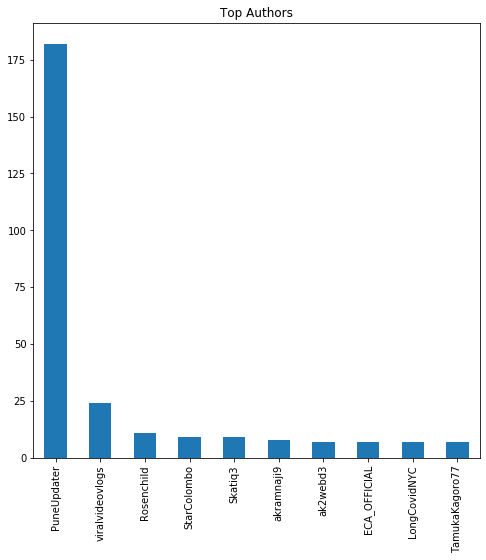

In [131]:
top_ten_authors.plot(kind="bar", title="Top Authors", figsize=[8, 8])

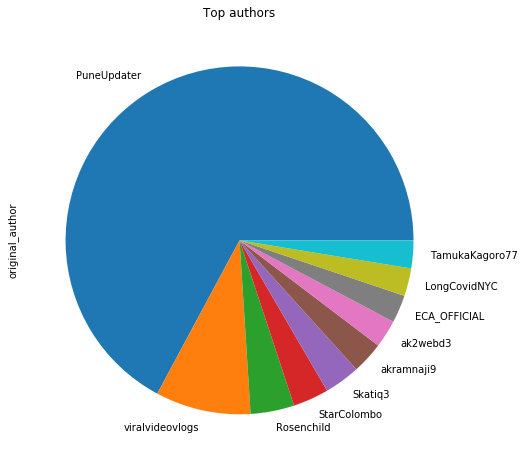

In [132]:
top_ten_authors.plot(kind="pie", title="Top authors", figsize=[8, 8])

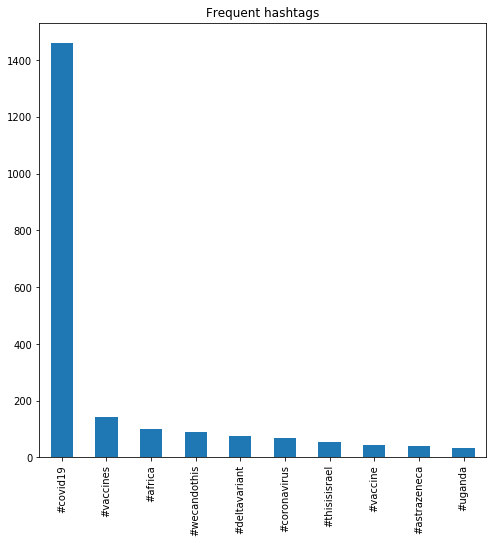

In [133]:
top_ten_hash_tags_used.plot(kind="bar", title="Frequent hashtags", figsize=[8, 8])

In [134]:
clean_text_df = pd.DataFrame(cleaned_tweet_df['clean_text'])
clean_text_df.dropna(inplace=True)
clean_text_df


,clean_text
0,"🚨africa is ""in the midst of a full-blown third..."
1,"dr moeti is head of who in africa, and one of ..."
2,thank you for creating this amazing campaign ...
3,"former pfizer vp and virologist, dr. michael y..."
4,i think it’s important that we don’t sell cova...
...,...
3706,"204,344 #covid19 vaccines have been administer..."
3707,"🚨africa is ""in the midst of a full-blown third..."
3708,i’m pleased to welcome the #wecandothis bus to...
3709,"in this interview, i discuss the possible lab ..."


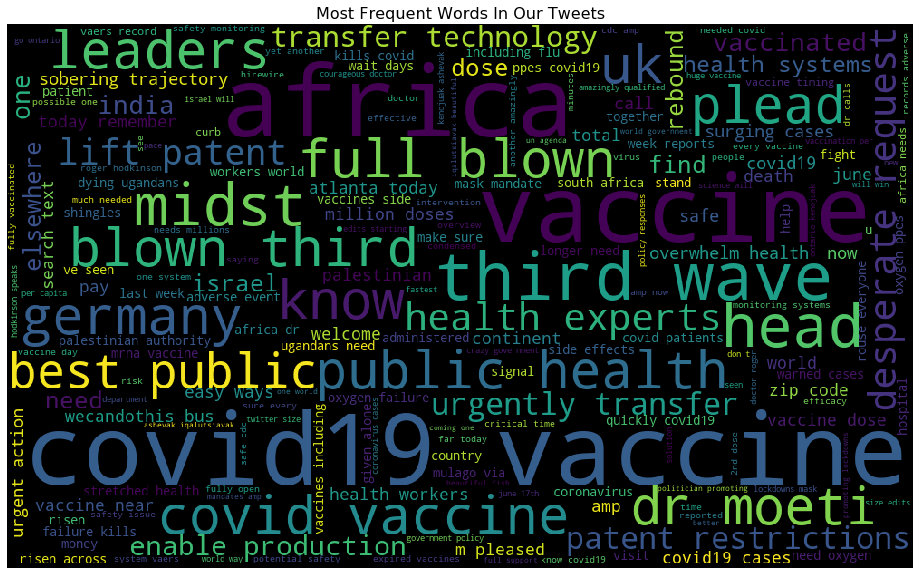

In [135]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(clean_text_df.clean_text)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()